In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment

In [11]:
def transform_data(x, theta):
    return (1 - x) ** (1 / (1 - theta))

In [13]:
def estimate_theta(data, sample_size):
    return sample_size / np.sum(np.log(data)) + 1

In [17]:
def calculate_median_confidence_interval(theta_estimate):
    term = 1.96 * np.log(2) * (2 ** (1 / (theta_estimate - 1))) / (theta_estimate - 1) / 10
    median = 2 ** (1 / (theta_estimate - 1))
    left = round(-term + median, 3)
    right = round(term + median, 3)
    return left, right


In [19]:
def calculate_asymptotic_confidence_interval(theta_estimate, sample_size):
    margin = 1.96 * (theta_estimate - 1) / np.sqrt(sample_size)
    left = round(-margin + theta_estimate, 3)
    right = round(margin + theta_estimate, 3)
    return left, right

In [21]:
def calculate_parametric_bootstrap_interval(theta, sample_size, num_samples=50000, alpha=0.05):
    bootstrap_estimates = np.sort(np.array([estimate_theta([transform_data(x, theta) for x in np.random.sample(sample_size)], sample_size) for _ in range(num_samples)]))
    left = round(bootstrap_estimates[int(alpha / 2 * num_samples)], 3)
    right = round(bootstrap_estimates[int((1 - alpha / 2) * num_samples)], 3)
    return left, right

In [23]:
def calculate_nonparametric_bootstrap_interval(data, theta_estimate, num_samples=1000, alpha=0.05):
    bootstrap_estimates = np.array([])
    for _ in range(num_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_estimates = np.append(bootstrap_estimates, estimate_theta(sample, len(sample)) - theta_estimate)
    bootstrap_estimates = np.sort(bootstrap_estimates)
    left = round(theta_estimate + bootstrap_estimates[int(alpha / 2 * num_samples)], 3)
    right = round(theta_estimate + bootstrap_estimates[int((1 - alpha / 2) * num_samples)], 3)
    return left, right

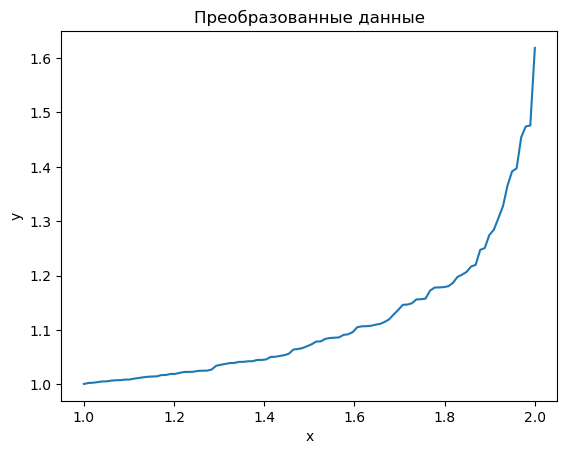

Оценка параметра theta:  10.839
Доверительный интервал для медианы: [ 1.058 ,  1.088 ]
Размах =  0.03
Асимптотический доверительный интервал: [ 8.91 ,  12.767 ]
Размах =  3.857
Параметрический бутстраповский интервал: [ 8.466 ,  12.057 ]
Размах =  3.591
Непараметрический бутстраповский интервал: [ 9.208 ,  13.215 ]
Размах =  4.007


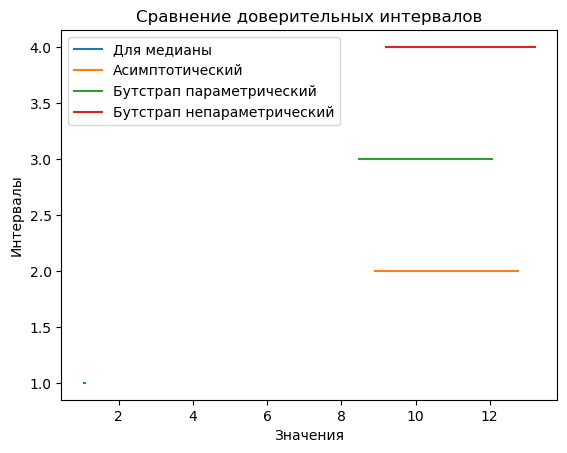

In [27]:
if __name__ == "__main__":
    # Параметры
    sample_size = 100
    theta = 10
    alpha = 0.05

    # Генерация данных
    np.random.seed(42)
    transformed_data = [transform_data(x, theta) for x in np.random.sample(sample_size)]
    transformed_data.sort()

    # Визуализация данных
    x_vals = np.linspace(1, 2, 100)
    plt.plot(x_vals, transformed_data)
    plt.title("Преобразованные данные")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    # Оценка параметра theta
    theta_estimate = estimate_theta(transformed_data, sample_size)
    print("Оценка параметра theta: ", round(theta_estimate, 3))

    # Доверительный интервал для медианы
    left_median, right_median = calculate_median_confidence_interval(theta_estimate)
    print("Доверительный интервал для медианы: [", left_median, ', ', right_median, ']')
    print("Размах = ", round(right_median - left_median, 3))

    # Асимптотический доверительный интервал
    left_asymptotic, right_asymptotic = calculate_asymptotic_confidence_interval(theta_estimate, sample_size)
    print("Асимптотический доверительный интервал: [", left_asymptotic, ', ', right_asymptotic, ']')
    print("Размах = ", round(right_asymptotic - left_asymptotic, 3))

    # Параметрический бутстраповский интервал
    left_parametric, right_parametric = calculate_parametric_bootstrap_interval(theta, sample_size)
    print("Параметрический бутстраповский интервал: [", left_parametric, ', ', right_parametric, ']')
    print("Размах = ", round(right_parametric - left_parametric, 3))

    # Непараметрический бутстраповский интервал
    left_nonparametric, right_nonparametric = calculate_nonparametric_bootstrap_interval(transformed_data, theta_estimate)
    print("Непараметрический бутстраповский интервал: [", left_nonparametric, ', ', right_nonparametric, ']')
    print("Размах = ", round(right_nonparametric - left_nonparametric, 3))

    # Визуализация интервалов
    x1 = np.linspace(left_median, right_median, 100)
    y1 = [1] * 100

    x2 = np.linspace(left_asymptotic, right_asymptotic, 100)
    y2 = [2] * 100

    x3 = np.linspace(left_parametric, right_parametric, 100)
    y3 = [3] * 100

    x4 = np.linspace(left_nonparametric, right_nonparametric, 100)
    y4 = [4] * 100

    plt.plot(x1, y1)
    plt.plot(x2, y2)
    plt.plot(x3, y3)
    plt.plot(x4, y4)

    plt.legend(["Для медианы", "Асимптотический", "Бутстрап параметрический", "Бутстрап непараметрический"])
    plt.title("Сравнение доверительных интервалов")
    plt.xlabel("Значения")
    plt.ylabel("Интервалы")
    plt.show()